## full data visualisation and preprocessing of titanic dataset

### best score of 0.779 .. using random forest classifier used in other file but I haven't done data visulaisation there.

In [1]:
import numpy as  np 
import pandas as pd 
import seaborn as sns 

In [2]:
df = pd.read_csv('dataset/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## data visualization

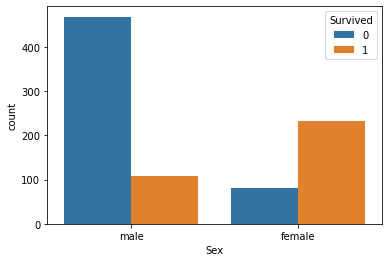

In [4]:
sns.countplot(df['Sex'], hue=df['Survived'])

## here it shows that most of females have survived

In [5]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

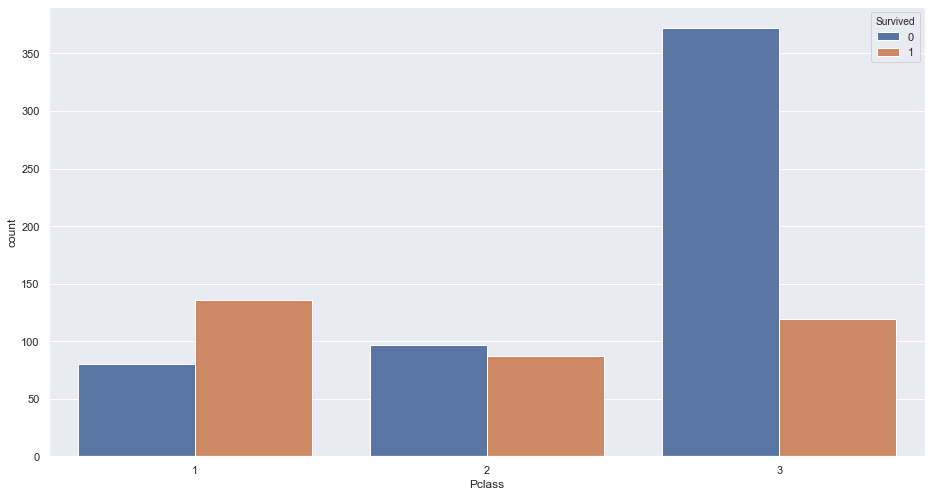

In [22]:
sns.countplot(df['Pclass'], hue=df['Survived'])

## it suggest that 1<sup>st</sup> class has more survival chances 

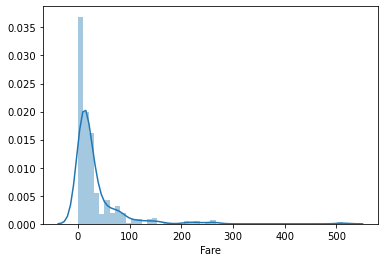

In [6]:
sns.distplot(df['Fare'])

## Fare is right skewed so probably we'll have to perform log or increase the power

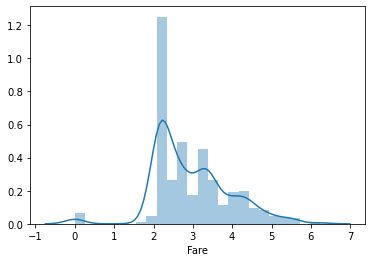

In [7]:
fare_log = np.log(df['Fare'] + 1) # some values are 0 and log of 0 doesn't exist
# fare_log = df['Fare'] ** 2 data is still skewed
sns.distplot(fare_log)

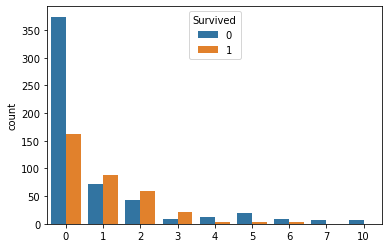

In [8]:
family = df['SibSp'] + df['Parch']
sns.countplot(family, hue=df['Survived'])

## as family size increases survival ratio also increases or becomes comparable to death ratio

In [3]:
titles = [ i.split(',')[1].split('.')[0].strip() for i in df['Name']]
titles[:5]

['Mr', 'Mrs', 'Miss', 'Mrs', 'Mr']

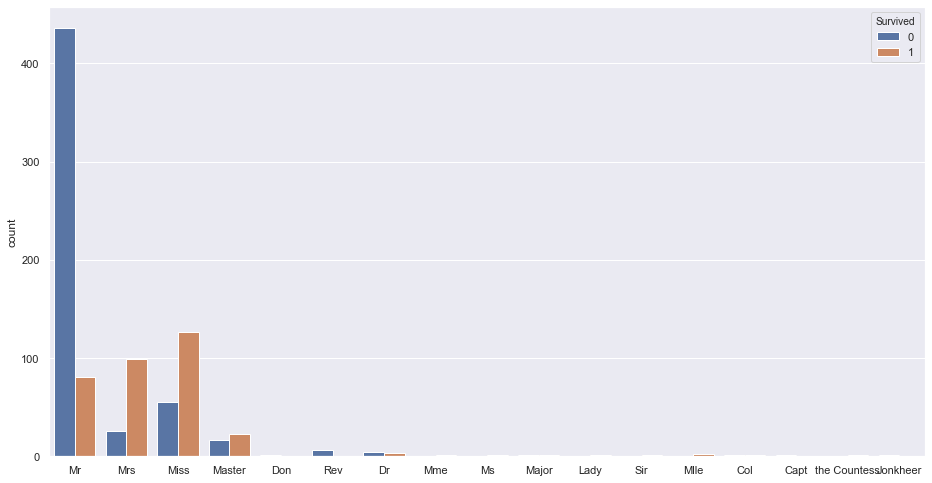

In [10]:
sns.set(rc={'figure.figsize':(15.7,8.27)}) # code for setting size
sns.countplot(titles, hue=df['Survived'], )

## it would be better to combine some titles into other as their count is very less
## like Ms into Mrs

In [4]:
df['titles'] = titles
df['titles']. value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Capt              1
Sir               1
Jonkheer          1
Don               1
Lady              1
Mme               1
Ms                1
the Countess      1
Name: titles, dtype: int64

In [5]:
df['titles'] = df['titles'].replace('Mlle', 'Miss')
df['titles'] = df['titles'].replace(['Mme','Lady','Ms'], 'Mrs')
df.titles.loc[ (df.titles !=  'Master') & (df.titles !=  'Mr') &
                   (df.titles !=  'Miss')  & (df.titles !=  'Mrs')] = 'Others'
df['titles'].value_counts()

Mr        517
Miss      184
Mrs       128
Master     40
Others     22
Name: titles, dtype: int64

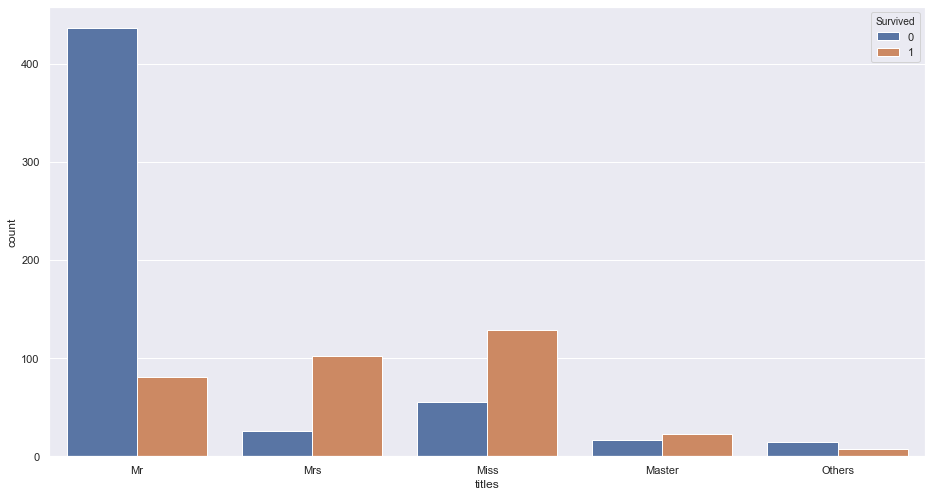

In [19]:
sns.countplot(df['titles'], hue=df['Survived'])

## from titles too it is clear that female survival rate is higher

# filling missing values and encoding categorical attributes

In [6]:
df['family'] = df['SibSp'] + df['Parch'] + 1 # the passenger himself has to be counted

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df['Embarked'] = imputer.fit_transform(df[['Embarked']])

In [8]:
df['Embarked'].isnull().sum()

0

In [9]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()       # better not to use param  drop='first'  here
# arr = ohe.fit_transform(df[['Sex', 'Embarked']])
# ohe.fit_transform(df[['Embarked']])
# ohe.fit_transform(df[['titles']])

In [76]:
arr.toarray()[:5]

array([[1., 0., 1.],
       [0., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 1.]])

In [77]:
ohe.categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [8]:
dummy = pd.get_dummies(df['Embarked'])

In [9]:
## for filling missing value in age it would be better to predict those based on survival 
df1 = pd.concat([df, dummy], axis=1)

In [15]:
df1 = pd.concat([df1, pd.get_dummies(df['titles'])], axis=1)
df1 = pd.concat([df1, pd.get_dummies(df['Sex'])], axis=1)
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'titles', 'family', 'C',
       'Q', 'S', 'Master', 'Miss', 'Mr', 'Mrs', 'Others', 'Master', 'Miss',
       'Mr', 'Mrs', 'Others', 'Master', 'Miss', 'Mr', 'Mrs', 'Others',
       'Master', 'Miss', 'Mr', 'Mrs', 'Others', 'female', 'male', 'Master',
       'Miss', 'Mr', 'Mrs', 'Others', 'female', 'male'],
      dtype='object')

In [17]:
df1.drop(['PassengerId', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'titles'], axis=1, inplace=True)

In [18]:
df1.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'family', 'C', 'Q', 'S', 'Master',
       'Miss', 'Mr', 'Mrs', 'Others', 'Master', 'Miss', 'Mr', 'Mrs', 'Others',
       'Master', 'Miss', 'Mr', 'Mrs', 'Others', 'Master', 'Miss', 'Mr', 'Mrs',
       'Others', 'female', 'male', 'Master', 'Miss', 'Mr', 'Mrs', 'Others',
       'female', 'male'],
      dtype='object')

In [20]:
df1.drop(['Master', 'Miss', 'Mr', 'Mrs', 'Others'], axis=1, inplace=True)
df1.head()

KeyError: "['Master' 'Miss' 'Mr' 'Mrs' 'Others' 'female' 'male'] not found in axis"

In [22]:
df1.drop(['female', 'male'], axis=1, inplace=True)
df1.head()

,Survived,Pclass,Age,Fare,family,C,Q,S
0,0,3,22.0,7.2500,2,0,0,1
1,1,1,38.0,71.2833,2,1,0,0
2,1,3,26.0,7.9250,1,0,0,1
3,1,1,35.0,53.1000,2,0,0,1
4,0,3,35.0,8.0500,1,0,0,1


In [23]:
df1 = pd.concat([df1, pd.get_dummies(df['titles'])], axis=1)

In [24]:
df1 = pd.concat([df1, pd.get_dummies(df['Sex'])], axis=1)

In [37]:
df1.head(6)

,Survived,Pclass,Age,Fare,family,C,Q,S,Master,Miss,Mr,Mrs,Others,female,male
0,0,3,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1
1,1,1,38.0,71.2833,2,1,0,0,0,0,0,1,0,1,0
2,1,3,26.0,7.9250,1,0,0,1,0,1,0,0,0,1,0
3,1,1,35.0,53.1000,2,0,0,1,0,0,0,1,0,1,0
4,0,3,35.0,8.0500,1,0,0,1,0,0,1,0,0,0,1
5,0,3,NaN,8.4583,1,0,1,0,0,0,1,0,0,0,1


In [32]:
x = df1[['Master', 'Miss', 'Mr', 'Mrs', 'Others', 'female', 'male', 'Survived']].loc[df['Age'].notnull()]

In [41]:
y = df1['Age'].dropna()

In [44]:
y

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [42]:
y.isnull().sum()

0

In [45]:
from sklearn.ensemble import RandomForestRegressor
rn_clf = RandomForestRegressor(n_estimators=300)
rn_clf.fit(x, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [49]:
x_unknown = df1[['Master', 'Miss', 'Mr', 'Mrs', 'Others', 'female', 'male', 'Survived']].loc[df['Age'].isnull()]

In [50]:
age_pred = rn_clf.predict(x_unknown)

In [46]:
y_unknown = df1["Age"].loc[df1['Age'].isnull()]

In [51]:
y_unknown = age_pred

In [52]:
df1["Age"].loc[df1['Age'].isnull()] = age_pred

In [53]:
df1['Age'].isnull().sum()

0

In [43]:
age_unknown = df1['Age'].loc[df['Age'].isnull()]

In [44]:
age_unknown

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

class customTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return np.log(X)

In [34]:
from sklearn.pipeline import Pipeline

In [45]:
cats= ['Embarked', 'Sex', 'titles']
nums = ['Pclass', 'family']
fare = ['Fare']

In [35]:
cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("ohe", OneHotEncoder())
])

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='median')),
])

In [52]:
from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer(transformers=[
    ("cat", cat_pipeline, cats),
    ("num", num_pipeline, nums),
    ("custom", customTransformer(), fare)
], remainder='passthrough')

In [53]:
fp = full_pipeline.fit_transform(df)

In [150]:
df1['Fare'] = np.log(df1['Fare'] + 1)

In [66]:
X = df1.drop("Survived", axis=1)
Y = df1['Survived']

In [67]:
X

,Pclass,Age,Fare,family,C,Q,S,Master,Miss,Mr,Mrs,Others,female,male
0,3,22.000000,7.2500,2,0,0,1,0,0,1,0,0,0,1
1,1,38.000000,71.2833,2,1,0,0,0,0,0,1,0,1,0
2,3,26.000000,7.9250,1,0,0,1,0,1,0,0,0,1,0
3,1,35.000000,53.1000,2,0,0,1,0,0,0,1,0,1,0
4,3,35.000000,8.0500,1,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,13.0000,1,0,0,1,0,0,0,0,1,0,1
887,1,19.000000,30.0000,1,0,0,1,0,1,0,0,0,1,0
888,3,18.647054,23.4500,4,0,0,1,0,1,0,0,0,1,0
889,1,26.000000,30.0000,1,1,0,0,0,0,1,0,0,0,1


In [137]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [138]:
mpl_clf = MLPClassifier(random_state=7)
svm_clf = SVC(C=40, random_state=7, probability=True)
des_clf = DecisionTreeClassifier()

In [139]:
classifiers = [mpl_clf, svm_clf, des_clf]

In [140]:
from sklearn.model_selection import cross_val_score
res = []
for classifier in classifiers:
    res.append(cross_val_score(classifier, X, Y, cv=5, scoring='accuracy'))

res_mean = []
for score in res:
    res_mean.append(score.mean())

In [141]:
res, res_mean

([array([0.80446927, 0.82022472, 0.80898876, 0.79775281, 0.86516854]),
  array([0.77653631, 0.81460674, 0.78651685, 0.75280899, 0.82022472]),
  array([0.79329609, 0.79775281, 0.83707865, 0.7752809 , 0.80898876])],
 [0.8193208210407381, 0.7901387232439897, 0.8024794425961961])

In [82]:
from sklearn.model_selection import GridSearchCV

params = [{'C': [50, 40, 45, 35], 'kernel': ['sigmoid', 'rbf']}]
grid = GridSearchCV(svm_clf, param_grid=params, scoring='f1')
grid.fit(X, Y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=7, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [50, 40, 45, 35], 'kernel': ['sigmoid', 'rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [83]:
grid.best_params_

{'C': 40, 'kernel': 'rbf'}

In [110]:
svm_clf.C = 40
svm_clf.fit(X, Y)
svm_clf.score(X, Y) 

0.8125701459034792

## lets try booster

In [86]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [95]:
ada_clg = AdaBoostClassifier(base_estimator=des_clf, random_state=7)
ada_clg.fit(X, Y)
cross_val_score(ada_clg, X, Y, scoring='f1')

array([0.75524476, 0.72992701, 0.77862595, 0.71875   , 0.78378378])

In [93]:
grad = GradientBoostingClassifier(random_state=7)
grad.fit(X,Y)
cross_val_score(grad, X, Y, scoring='f1')

array([0.79411765, 0.80916031, 0.82706767, 0.78333333, 0.82352941])

In [96]:
bag_ada_clf = BaggingClassifier(base_estimator=ada_clg, n_estimators=20, random_state=7)
cross_val_score(bag_ada_clf, X, Y, cv=5, scoring='f1')

array([0.75912409, 0.76923077, 0.79069767, 0.72      , 0.80555556])

In [98]:
bag_grad_clf = BaggingClassifier(base_estimator=grad, n_estimators=20, random_state=7)
cross_val_score(bag_grad_clf, X, Y, cv=5, scoring='f1')

array([0.78518519, 0.81538462, 0.8125    , 0.77310924, 0.81203008])

In [99]:
bag_svm_clf = BaggingClassifier(base_estimator=svm_clf, n_estimators=20, random_state=7)
cross_val_score(bag_svm_clf, X, Y, cv=5, scoring='f1')

array([0.73469388, 0.76119403, 0.71014493, 0.64566929, 0.75384615])

## seems like bagging classifier is not working well 
## lets create voting classifier with svm, grad, des and mpl

In [146]:
from sklearn.ensemble import VotingClassifier
vot = VotingClassifier(estimators=[
    ("svm", svm_clf),
    ("grad", grad),
    ("des", des_clf),
    ("mpl", mpl_clf)
], voting='soft')

In [145]:
cross_val_score(vot, X, Y, scoring='f1')

array([0.75590551, 0.76923077, 0.7768595 , 0.65486726, 0.79411765])

In [148]:
vot.fit(X,Y)

VotingClassifier(estimators=[('svm',
                              SVC(C=40, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=-1,
                                  probability=True, random_state=7,
                                  shrinking=True, tol=0.001, verbose=False)),
                             ('grad',
                              GradientBoostingClassifier(ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_r...
                                            epsilon=1e-08,
                                            hidden_layer_sizes=(100,),
                                            learning_rate='constan

# preparing test data

In [118]:
test = pd.read_csv('dataset/titanic/test.csv')

In [119]:
test['family'] = test['SibSp'] + test['Parch'] + 1

In [123]:
titles = [ i.split(',')[1].split('.')[0].strip() for i in test['Name']]
test['titles'] = titles

In [125]:
test['titles'] = test['titles'].replace('Mlle', 'Miss')
test['titles'] = test['titles'].replace(['Mme','Lady','Ms'], 'Mrs')
test.titles.loc[ (test.titles !=  'Master') & (test.titles !=  'Mr') &
                   (test.titles !=  'Miss')  & (test.titles !=  'Mrs')] = 'Others'

In [126]:
### very bad code


from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
test['Embarked'] = imputer.fit_transform(test[['Embarked']])

testdf1 = pd.concat([test, pd.get_dummies(test['Embarked'])], axis=1)
testdf1 = pd.concat([testdf1, pd.get_dummies(test['titles'])], axis=1)
testdf1 = pd.concat([testdf1, pd.get_dummies(test['Sex'])], axis=1)

testdf1.drop(['PassengerId', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'titles'], axis=1, inplace=True)
testdf1.drop(['Master', 'Miss', 'Mr', 'Mrs', 'Others', 'female', 'male'], axis=1, inplace=True)
testdf1 = pd.concat([testdf1, pd.get_dummies(test['titles'])], axis=1)
testdf1 = pd.concat([testdf1, pd.get_dummies(test['Sex'])], axis=1)

In [127]:
testdf1

,Pclass,Age,Fare,family,C,Q,S,Master,Miss,Mr,Mrs,Others,female,male
0,3,34.5,7.8292,1,0,1,0,0,0,1,0,0,0,1
1,3,47.0,7.0000,2,0,0,1,0,0,0,1,0,1,0
2,2,62.0,9.6875,1,0,1,0,0,0,1,0,0,0,1
3,3,27.0,8.6625,1,0,0,1,0,0,1,0,0,0,1
4,3,22.0,12.2875,3,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,NaN,8.0500,1,0,0,1,0,0,1,0,0,0,1
414,1,39.0,108.9000,1,1,0,0,0,0,0,0,1,1,0
415,3,38.5,7.2500,1,0,0,1,0,0,1,0,0,0,1
416,3,NaN,8.0500,1,0,0,1,0,0,1,0,0,0,1


In [131]:
x = testdf1[['Master', 'Miss', 'Mr', 'Mrs', 'Others', 'female', 'male']].loc[test['Age'].notnull()]
y = testdf1['Age'].dropna()
from sklearn.ensemble import RandomForestRegressor
rn_clf = RandomForestRegressor(n_estimators=300)
rn_clf.fit(x, y)
x_unknown = testdf1[['Master', 'Miss', 'Mr', 'Mrs', 'Others', 'female', 'male']].loc[test['Age'].isnull()]
age_pred = rn_clf.predict(x_unknown)
testdf1["Age"].loc[testdf1['Age'].isnull()] = age_pred

In [133]:
testdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
Pclass    418 non-null int64
Age       418 non-null float64
Fare      417 non-null float64
family    418 non-null int64
C         418 non-null uint8
Q         418 non-null uint8
S         418 non-null uint8
Master    418 non-null uint8
Miss      418 non-null uint8
Mr        418 non-null uint8
Mrs       418 non-null uint8
Others    418 non-null uint8
female    418 non-null uint8
male      418 non-null uint8
dtypes: float64(2), int64(2), uint8(10)
memory usage: 17.3 KB


In [153]:
testdf1['Fare'] = np.log(testdf1['Fare'] + 1)

In [158]:
testdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
Pclass    418 non-null int64
Age       418 non-null float64
Fare      418 non-null float64
family    418 non-null int64
C         418 non-null uint8
Q         418 non-null uint8
S         418 non-null uint8
Master    418 non-null uint8
Miss      418 non-null uint8
Mr        418 non-null uint8
Mrs       418 non-null uint8
Others    418 non-null uint8
female    418 non-null uint8
male      418 non-null uint8
dtypes: float64(2), int64(2), uint8(10)
memory usage: 17.3 KB


In [157]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
testdf1['Fare'] = imputer.fit_transform(testdf1[['Fare']])

In [159]:
pred = vot.predict(testdf1)

In [160]:
sample = pd.read_csv('dataset/titanic/gender_submission.csv')
sample['Survived'] = pred

In [162]:
sample.to_csv('mplvot.csv', index=False)

In [163]:
pred_grad = grad.predict(testdf1)
sample['Survived'] = pred_grad
sample.to_csv('grad.csv', index=False)

In [165]:
des_clf.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [166]:
pred_des = des_clf.predict(testdf1)
sample['Survived'] = pred_des
sample.to_csv('des_clf.csv', index=False)